In [190]:
import numpy as np
import scipy.integrate as integrate
from math import fabs, sqrt, log, exp, pi, cos, sin
from scipy.stats import norm
import matplotlib.pyplot as plt

In [102]:
%matplotlib inline

In [103]:
# Cumulative Distribution of the standard normal variable N(z)
# From "A Primer for the Mathematics of Financial Engineering - Stefanica"
def cdiststd(t):
  z = fabs(t)
  y = 1/(1+0.2316419*z)
  a1 = 0.319381530
  a2 = -0.356563782
  a3 = 1.781477937
  a4 = -1.821255978
  a5 = 1.330274429
  ae = a1*y + a2*y**2 + a3*y**3 + a4*y**4 + a5*y**5
  m = 1 - exp(-t**2/2) * ae / sqrt(2*pi)
  if t > 0:
    return m
  else:
    return 1 - m

In [183]:
# The above function is available in scipy.stats
# Note (see timeit study below - the book cdf approximation is very good and about 30 times! faster than scipy cdf)
def cdfnorm(t):
    return norm.cdf(t)

In [105]:
#
# t = current time, T = maturity time (in fractional year, 6mo = .5)
# S = spot price of underlying at time (t)
# K = strike price of option at time (t)
# T = maturity time. (T-t) is time to maturity.
# s = stddev of underlying asset price price. (debatable as to over which period calculated over*)
# r = risk free interest rate. (assumed steady. Also debatable over which period calculated over*)
# q = dividend rate paid on underlying asset. (assumed fixed. could be derived from GM of past dividends*)
#
# *IMHOP
#
# Returns Call price and Put price.
#
def black(t,S,K,T,s,r,q,cdf):
  d1 = (log(S/K)+(r-q+s**2/2)*(T-t))/(s*sqrt(T-t))
  d2 = d1 - s*sqrt(T-t)
  C = S*exp(-q*(T-t))*cdf(d1) - K*exp(-r*(T-t))*cdf(d2)
  P = K*exp(-r*(T-t))*cdf(-d2) - S*exp(-q*(T-t))*cdf(-d1)
  return (C,P) 


In [107]:
x = np.linspace(0,1,num=20)

In [113]:
y = np.array([cdiststd(x) for x in x])

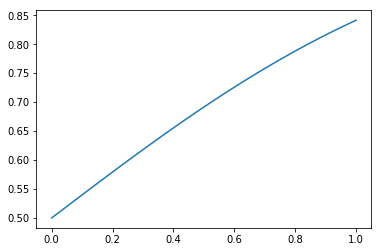

In [114]:
plt.plot(x,y)

In [115]:
ynorm = np.array([norm.cdf(x) for x in x])

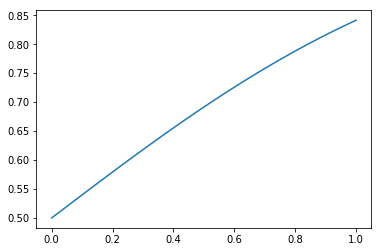

In [151]:
plt.plot(x,ynorm)

In [152]:
import timeit

In [184]:
import timeit
timebook = timeit.timeit('np.array([cdiststd(x) for x in np.linspace(0,1,num=20)])',
              setup="import numpy as np;from __main__ import cdiststd",
              number=100)
timescipy = timeit.timeit('np.array([norm.cdf(x) for x in np.linspace(0,1,num=20)])',
              setup="import numpy as np;from scipy.stats import norm",
              number=100)
print(f"cdf runtime comparison: timescipy / timebook: {timescipy/timebook}")


cdf runtime comparison: timescipy / timebook: 29.07721864715777


In [178]:
print(f'rmse of book cdf to scypi cdf: {sum((y-ynorm)**2).mean()}')

rmse of book cdf to scypi cdf: 4.682577271682222e-14


In [174]:
black(0,42,40,.5,.3,.05,.03,cdiststd)

(4.705325237643848, 2.343020255448522)

In [175]:
black(0,42,40,.5,.3,.05,.03,cdfnorm)

(4.7053274115128225, 2.3430224293174966)

In [119]:
integrate.quad(lambda x: exp(-x**2),0,2)

(0.8820813907624215, 9.793070696178202e-15)

In [193]:
from sympy import *

In [271]:
x, y = symbols('x y')

In [276]:
sympy.diff(100*(y - x**2)**2 + (1 - y)**2,x,y)

-400*x

In [204]:
sympy.diff(-400*x*(-x**2 + y),y)

-400*x

In [265]:
from mpl_toolkits import mplot3d

In [266]:
def rosen(x,y):
    return 100*(y - x**2)**2 + (1 - y)**2


In [267]:
x = np.linspace(-2,2,20)
y = np.linspace(-2,2,20)
X, Y = np.meshgrid(x,y)
Z = rosen(X,Y)

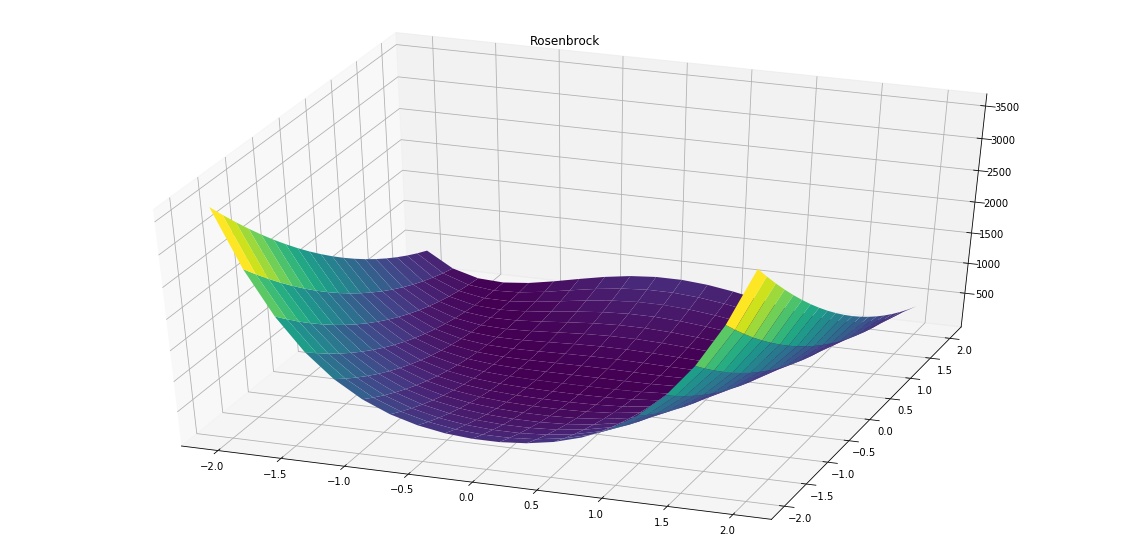

In [268]:
fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.view_init(40, -70)
ax.set_title('Rosenbrock');


In [277]:
p1, p2 = symbols("p1 p2")

In [309]:
sympy.diff(40*p1+26*p2-5*p1**2-7*p2**2+5*p1*p2-155,p1) # first partial

-10*p1 + 5*p2 + 40

In [311]:
sympy.diff(40*p1+26*p2-5*p1**2-7*p2**2+5*p1*p2-155,p1,2) # second partial

-10

In [312]:
sympy.diff(40*p1+26*p2-5*p1**2-7*p2**2+5*p1*p2-155,p2) # first

5*p1 - 14*p2 + 26

In [313]:
sympy.diff(40*p1+26*p2-5*p1**2-7*p2**2+5*p1*p2-155,p2,2) # second

-14

In [326]:
sympy.diff(40*p1+26*p2-5*p1**2-7*p2**2+5*p1*p2-155,p1,p2) # cross

5

In [285]:
A = np.matrix([[-10,5],[5,-14]])

In [298]:
R = np.matrix([[-40,-26]]).T

In [300]:
x = A.I*R

In [314]:
x[0,0], x[1,0]

(6.0, 4.0)

In [319]:
def Zf(p1,p2):
    return 40*p1+26*p2-5*p1**2-7*p2**2+5*p1*p2-155

In [320]:
x = np.linspace(0,15,20)
y = np.linspace(0,15,20)
X, Y = np.meshgrid(x,y)
Z = Zf(X,Y)

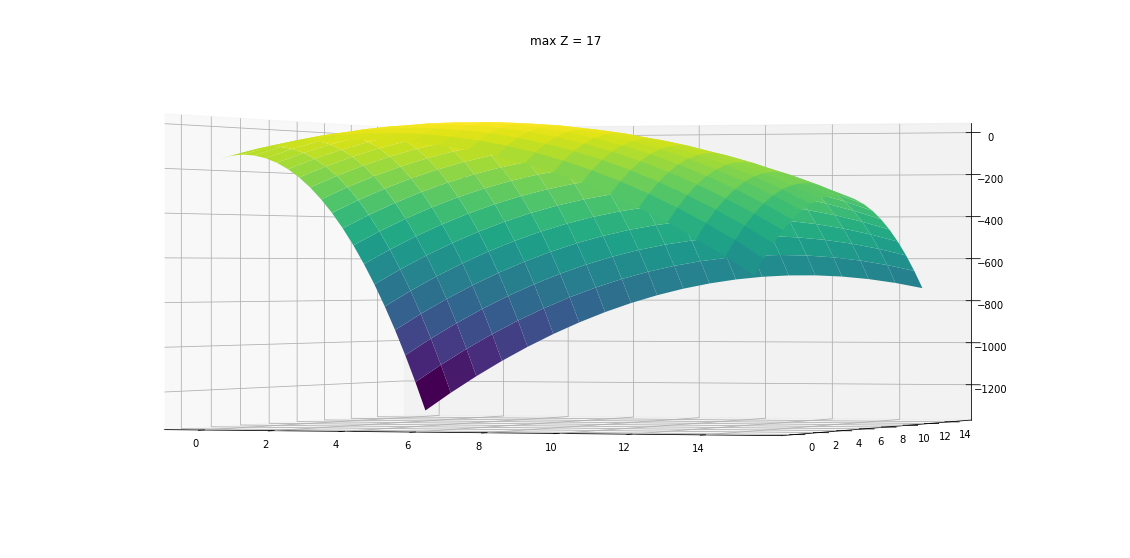

In [325]:
fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.view_init(0, -70)
ax.set_title(f'max Z = {Zf(6,4)}');